In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk import FreqDist

## Getting to know the data

In [5]:
amazon_df = pd.read_table("amazon_cells_labelled.txt",names = ["Reviews","Labels"])
amazon_df.head()

,Reviews,Labels
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
imdb_df = pd.read_table("imdb_labelled.txt",names = ["Reviews","Labels"])
imdb_df.head()

,Reviews,Labels
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
yelp_df = pd.read_table("yelp_labelled.txt",names = ["Reviews","Labels"])
yelp_df.head()

,Reviews,Labels
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
ama_sentTokens,yelp_sentTokens,imdb_sentTokens= np.array(amazon_df["Reviews"]) ,np.array(yelp_df["Reviews"]),np.array(imdb_df["Reviews"])
print("The number of sentences in amazon data is: " + str(len(ama_sentTokens)))
print("The number of sentences in yelp data is: " + str(len(yelp_sentTokens)))
print("The number of sentences in imdb data is: " + str(len(imdb_sentTokens)))

The number of sentences in amazon data is: 1000
The number of sentences in yelp data is: 1000
The number of sentences in imdb data is: 748


In [9]:
ama_wordTokens,yelp_wordTokens,imdb_wordTokens =[],[],[]
for sent in ama_sentTokens:
    ama_wordTokens.extend(sent.split())
for sentence in yelp_sentTokens:
    yelp_wordTokens.extend(sentence.split())
for sente in imdb_sentTokens:
    imdb_wordTokens.extend(sente.split())
print("The number of words in amazon data is: " + str(len(ama_wordTokens)))
print("The number of words in yelp data is: " + str(len(yelp_wordTokens)))
print("The number of words in imdb data is: " + str(len(imdb_wordTokens)))

The number of words in amazon data is: 10246
The number of words in yelp data is: 10894
The number of words in imdb data is: 14602


In [10]:
print("The number of unique words in amazon data is: " + str(len(set(ama_wordTokens))))
print("The number of unique words in yelp data is: " + str(len(set(yelp_wordTokens))))
print("The number of unique words in imdb data is: " + str(len(set(imdb_wordTokens))))

The number of unique words in amazon data is: 2815
The number of unique words in yelp data is: 2969
The number of unique words in imdb data is: 4248


In [11]:
print("The average number of times a word is used in amazon data is: " + str(len(ama_wordTokens)/len(set(ama_wordTokens))))
print("The average number of times a word is used in yelp data is: " + str(len(yelp_wordTokens)/len(set(yelp_wordTokens))))
print("The average number of times a word is used in imdb data is: " + str(len(imdb_wordTokens)/len(set(imdb_wordTokens))))

The average number of times a word is used in amazon data is: 3.6397868561278863
The average number of times a word is used in yelp data is: 3.6692489053553383
The average number of times a word is used in imdb data is: 3.437382297551789


(-0.5, 399.5, 199.5, -0.5)

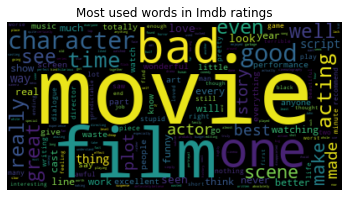

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# instantiate the wordcloud
wcloud = WordCloud(random_state=0).generate(" ".join(imdb_wordTokens))

# show the image
plt.title(label= "Most used words in Imdb ratings")
plt.imshow(wcloud, interpolation = 'bilinear')
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

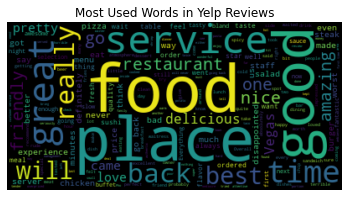

In [13]:
ama_wcloud= WordCloud(random_state = 0).generate(" ".join(ama_wordTokens))
yelp_wcloud = WordCloud(random_state = 0).generate(" ".join(yelp_wordTokens))
plt.title("Most Used Words in Yelp Reviews")
plt.imshow(yelp_wcloud, interpolation = "bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

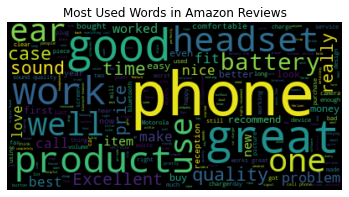

In [14]:
plt.title("Most Used Words in Amazon Reviews")
plt.imshow(ama_wcloud, interpolation = "bilinear")
plt.axis("off")

In [16]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Text Preprocessing 

In [17]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()
stop_words = stopwords.words('english')

def trashRemover(var):
    cleanTokens = [wn.lemmatize(word.lower()) for word in var if len(word)>2 and not word.isdigit() and word not in stop_words and word not in string.punctuation]
    return cleanTokens

clean_amazon = trashRemover(ama_wordTokens)
clean_imdb = trashRemover(imdb_wordTokens)
clean_yelp = trashRemover(yelp_wordTokens)
print(len(clean_amazon))
print(len(clean_imdb))
print(len(clean_yelp))

5724
8064
6060


In [18]:
def freqPlotter(alist):
    plt.figure(figsize = (8, 5))
    freq = FreqDist(alist)
    freq.plot(20, cumulative = False)
    plt.show()

In [19]:
def getFreqTable(blist):
    fr = FreqDist(blist)
    frequencies = [fr[key] for key in fr.keys()]
    words = list(fr.keys())
    freqTable = pd.DataFrame(columns = ["Words","Frequencies"])
    freqTable["Words"] = words
    freqTable["Frequencies"] = frequencies
    freqTable = freqTable.sort_values("Frequencies", ascending = False)
    return freqTable

In [20]:
getFreqTable(clean_amazon).head(10)

,Words,Frequencies
122,phone,125
16,the,99
83,work,66
4,good,66
8,great,63
145,this,54
52,battery,41
199,headset,39
47,sound,37
32,one,35


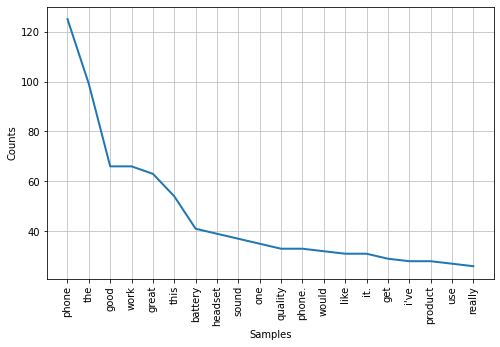

In [21]:
freqPlotter(clean_amazon)

In [22]:
getFreqTable(clean_imdb).head(10)

,Words,Frequencies
41,the,185
3,movie,154
117,film,124
94,this,77
193,one,69
276,like,49
66,good,47
746,bad,44
12,character,43
406,really,40


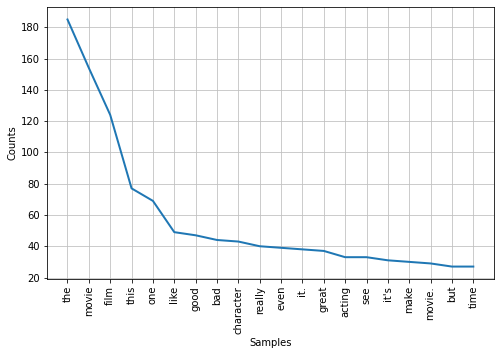

In [23]:
freqPlotter(clean_imdb)

In [24]:
getFreqTable(clean_yelp).head(10)

,Words,Frequencies
18,the,177
120,food,93
81,place,82
146,good,62
46,service,57
21,great,57
80,this,47
34,like,46
40,time,45
297,back,36


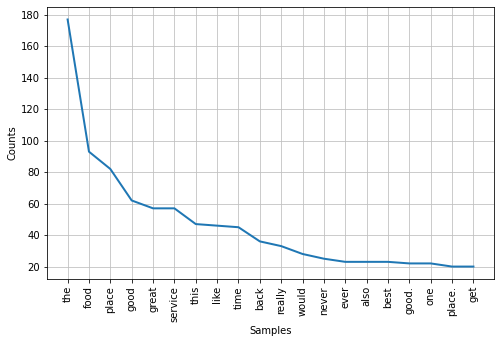

In [20]:
freqPlotter(clean_yelp)

In [25]:
def removeThe(clist):
    theAbsent = [word.strip(".").strip(",") for word in clist if word != "the"]
    return theAbsent
clean_imdb,clean_amazon,clean_yelp = trashRemover(removeThe(clean_imdb)),trashRemover(removeThe(clean_amazon)),trashRemover(removeThe(clean_yelp))

In [26]:
print(len(clean_imdb))
print(len(clean_amazon))
print(len(clean_yelp))

7371
5218
5514


In [27]:
getFreqTable(clean_yelp).head(10)

,Words,Frequencies
78,food,123
2,place,108
4,good,91
40,service,81
18,great,68
43,back,57
35,time,54
29,like,47
286,really,36
378,best,30


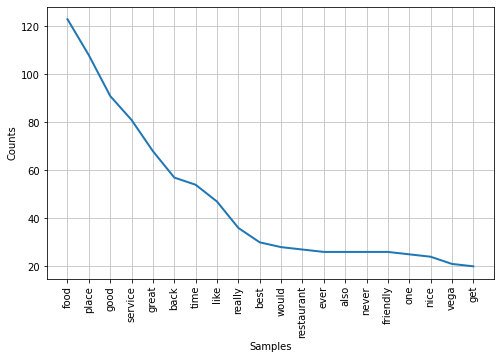

In [28]:
freqPlotter(clean_yelp)

In [29]:
getFreqTable(clean_imdb).head(10)

,Words,Frequencies
2,movie,201
106,film,170
176,one,75
472,bad,65
10,character,56
60,good,56
246,like,49
189,time,44
354,really,41
26,acting,40


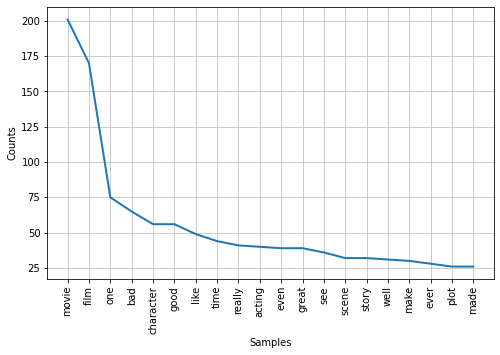

In [30]:
freqPlotter(clean_imdb)

In [31]:
getFreqTable(clean_amazon).head(10)

,Words,Frequencies
67,phone,164
8,great,87
73,work,80
4,good,74
133,product,56
56,headset,53
42,quality,48
46,battery,46
41,sound,42
91,use,41


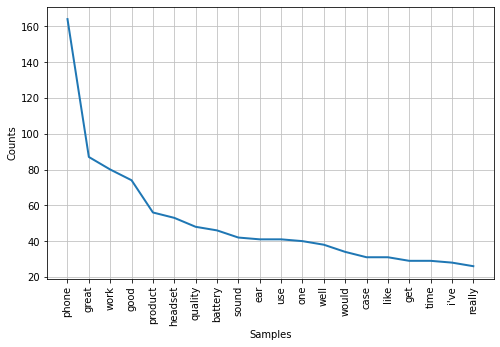

In [32]:
freqPlotter(clean_amazon)

In [29]:
set(clean_amazon)

{'cancellation',
 'spec',
 'always',
 'happened',
 'feature',
 'super',
 'activated',
 'unit',
 'contact',
 'amazed',
 'ok)',
 '(irda)',
 'compared',
 'study',
 'lock',
 'originally',
 'ergonomic',
 'crashed',
 'thats',
 'jerk',
 'flash',
 'stuck',
 'ripped',
 'contacted',
 'relative',
 'infra',
 'saying',
 'double',
 'currently',
 'excrutiatingly',
 'rest',
 'smoothly',
 'source',
 'muffled',
 'colors!',
 'protective',
 'everyone!',
 'probably',
 'counterfeit',
 'basic',
 'thin',
 'deal',
 'effort',
 'flip',
 'aluminum',
 'latest',
 'tone',
 'voltage',
 'buyer',
 'painful',
 'price',
 'internet)to',
 'beep',
 'morning',
 'old',
 'lousy',
 'suck',
 'original',
 'purcashed',
 'superfast',
 'think',
 'connection',
 'superb',
 'back',
 'be.3',
 'wirefly',
 'brand',
 'somewhere',
 'thumb',
 'expected',
 'last',
 'luck',
 'plus',
 '(for',
 'plantronincs',
 'favorite',
 'placed',
 'expect',
 'lacking',
 'zero',
 'cracked.i',
 'instruction',
 'distracting',
 'glove',
 'faceplate',
 'iam',
 'q

In [33]:
def featureExtractor(sentenceList):
    wordLists = [sent.split() for sent in sentenceList]
    features = [" ".join(trashRemover(removeThe(wordlist))) for wordlist in wordLists]
    
    return features

featureExtractor(["Madagascar is fucking stupid","I the will fucking destroy you"])

['madagascar fucking stupid', 'fucking destroy']

In [34]:
final_features = featureExtractor(ama_sentTokens)+featureExtractor(yelp_sentTokens)+featureExtractor(imdb_sentTokens)
final_labels =  list(amazon_df["Labels"]) + list(yelp_df["Labels"]) + list(imdb_df["Labels"])

In [35]:
len(final_features)

2748

In [36]:
len(final_labels)

2748

In [37]:
final_df = pd.DataFrame(columns=["Reviews","Labels"])
final_df["Reviews"] = final_features
final_df["Labels"] = final_labels
final_df.head()

,Reviews,Labels
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversation lasting minutes.majo...,0
4,the mic great,1


In [39]:
from sklearn.model_selection import train_test_split
y = final_df['Labels']
X_train, X_test, y_train, y_test = train_test_split(final_df['Reviews'],y, test_size = 0.33, random_state = 0)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [41]:
count_vectorizer.get_feature_names()[:10]

['10', '100', '12', '13', '15g', '15pm', '17', '1947', '1948', '1980']

In [42]:
count_train.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['10', '100', '12', '13', '15g', '15pm', '17', '1947', '1948', '1980']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Model construction, testing and validation

In [44]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 
from sklearn.svm import SVC 

In [55]:
gnb = GaussianNB() 
bnb = BernoulliNB()
mnb = MultinomialNB()
cnb = ComplementNB()
svm = SVC()
classifiers = [gnb,bnb,mnb,cnb,svm]
count_accuracies = []
tfidf_accuracies = []
for classifier in classifiers:
    classifier.fit(count_train.toarray(),y_train)
    count_accuracies.append(metrics.accuracy_score(y_test,classifier.predict(count_test.toarray())))
    classifier.fit(tfidf_train.toarray(),y_train)
    tfidf_accuracies.append(metrics.accuracy_score(y_test,classifier.predict(tfidf_test.toarray())))

In [56]:
algo_df = pd.DataFrame(index = ["GaussianNB","BernoulliNB","MultinomialNB","ComplementNB","SVC"], columns=["CV_Accuracies","TFIDF_Accuracies"])
algo_df["CV_Accuracies"]=count_accuracies
algo_df["TFIDF_Accuracies"]=tfidf_accuracies
algo_df

,CV_Accuracies,TFIDF_Accuracies
GaussianNB,0.652701,0.690187
BernoulliNB,0.748622,0.748622
MultinomialNB,0.746417,0.770673
ComplementNB,0.757442,0.777288
SVC,0.770673,0.777288


<AxesSubplot:>

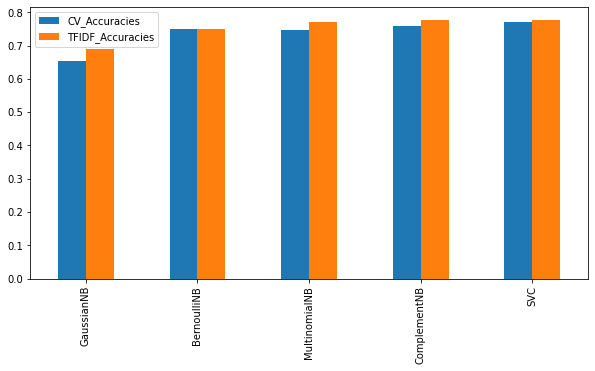

In [57]:
algo_df.plot(kind="bar", figsize =(10,5),mark_right = True )


In [80]:
def c_runner(algorithm):
    c_accuracies= []
    my_tups = [(1,1),(2,2),(3,3),(4,4),(5,5)]
    for tup in my_tups:
        cv = CountVectorizer(ngram_range = tup, stop_words = 'english')
        C_train, C_test, cy_train, cy_test = train_test_split(final_df['Reviews'],final_df["Labels"], test_size = 0.33, random_state = 0, stratify= final_df["Labels"])
        c_train = cv.fit_transform(C_train)
        c_test = cv.transform(C_test)
        algorithm.fit(c_train.toarray(),cy_train)
        c_accuracies.append(metrics.accuracy_score(cy_test,algorithm.predict(c_test.toarray())))
    return c_accuracies

In [81]:
gnb_c_acc = c_runner(gnb)

In [82]:
bnb_c_acc,mnb_c_acc,cnb_c_acc,svm_c_acc = c_runner(bnb),c_runner(mnb),c_runner(cnb),c_runner(svm)

In [83]:
n_grams= [(1,1),(2,2),(3,3),(4,4),(5,5)]
c_df = pd.DataFrame(index = n_grams, columns=["GaussianNB","BernoulliNB","MultinomialNB","ComplementNB","SVC"])
c_df["GaussianNB"],c_df["BernoulliNB"],c_df["MultinomialNB"],c_df["ComplementNB"],c_df["SVC"] = gnb_c_acc,bnb_c_acc,mnb_c_acc,cnb_c_acc,svm_c_acc
c_df

,GaussianNB,BernoulliNB,MultinomialNB,ComplementNB,SVC
"(1, 1)",0.691290,0.778390,0.779493,0.785006,0.761852
"(2, 2)",0.554576,0.557883,0.557883,0.606395,0.545755
"(3, 3)",0.503859,0.517089,0.517089,0.503859,0.496141
"(4, 4)",0.503859,0.503859,0.503859,0.496141,0.496141
"(5, 5)",0.503859,0.503859,0.503859,0.496141,0.496141


In [85]:
c_values = [0.1,0.3,0.5,0.7,0.9]
svm_train_accuracy2=[]
svm_test_accuracy2=[]
for i in c_values:
    svm = SVC(C = i)
    svm.fit(tfidf_train.toarray(),y_train)
    svm_train_accuracy2.append(svm.score(tfidf_train.toarray(),y_train))
    svm_test_accuracy2.append(svm.score(tfidf_test.toarray(),y_test))

In [86]:
svc2_df = pd.DataFrame(index = c_values, columns=["SVC_train_accuracy","SVC_test_accuracy"])
svc2_df["SVC_train_accuracy"],svc2_df["SVC_test_accuracy"] = svm_train_accuracy2,svm_test_accuracy2 
svc2_df 

,SVC_train_accuracy,SVC_test_accuracy
0.1,0.560022,0.535832
0.3,0.957632,0.739802
0.5,0.974470,0.759647
0.7,0.984248,0.765160
0.9,0.988050,0.770673


In [89]:
c_values = [1.1,1.3,1.5,1.7,1.9]
svm_train_accuracy3=[]
svm_test_accuracy3=[]
for i in c_values:
    svm = SVC(C = i)
    svm.fit(tfidf_train.toarray(),y_train)
    svm_train_accuracy3.append(svm.score(tfidf_train.toarray(),y_train))
    svm_test_accuracy3.append(svm.score(tfidf_test.toarray(),y_test))

In [98]:
svc3_df = pd.DataFrame(index = c_values, columns=["SVC_train_accuracy","SVC_test_accuracy"])
svc3_df["SVC_train_accuracy"],svc3_df["SVC_test_accuracy"] = svm_train_accuracy3,svm_test_accuracy3 
svc3_df 

,SVC_train_accuracy,SVC_test_accuracy
1.1,0.989680,0.780595
1.3,0.991309,0.785006
1.5,0.992395,0.781698
1.7,0.992395,0.778390
1.9,0.992395,0.781698


Text(0, 0.5, 'C_values')

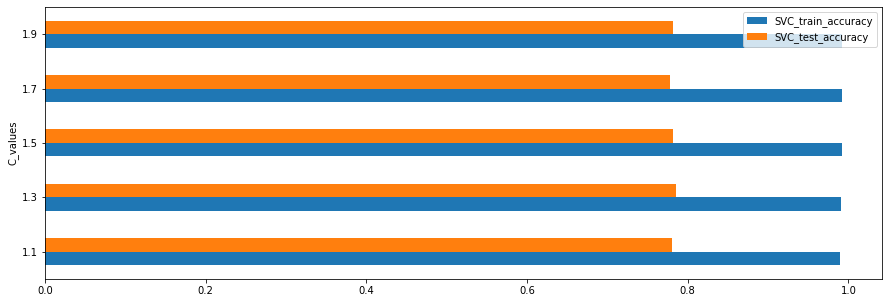

In [99]:
svc3_df.plot(kind ="barh", figsize =(15,5))
plt.ylabel("C_values")

In [96]:
y_values = [1.1,1.3,1.5,1.7,1.9]
svm_train_accuracy4=[]
svm_test_accuracy4=[]
for i in y_values:
    svm = SVC(C = 1.5, gamma = i)
    svm.fit(tfidf_train.toarray(),y_train)
    svm_train_accuracy4.append(svm.score(tfidf_train.toarray(),y_train))
    svm_test_accuracy4.append(svm.score(tfidf_test.toarray(),y_test))

In [97]:
svc4_df = pd.DataFrame(index = c_values, columns=["SVC_train_accuracy","SVC_test_accuracy"])
svc4_df["SVC_train_accuracy"],svc4_df["SVC_test_accuracy"] = svm_train_accuracy4,svm_test_accuracy4 
svc4_df 

,SVC_train_accuracy,SVC_test_accuracy
1.1,0.992395,0.782800
1.3,0.993482,0.787211
1.5,0.995111,0.782800
1.7,0.995655,0.780595
1.9,0.995655,0.776185


In [101]:
alpha_values = [0.0001,0.001,0.01,0.1]
cnb_train_accuracy = []
cnb_test_accuracy = []
for value in alpha_values:
    cnb = ComplementNB(alpha = value)
    cnb.fit(tfidf_train.toarray(),y_train)
    cnb_train_accuracy.append(cnb.score(tfidf_train.toarray(),y_train))
    cnb_test_accuracy.append(cnb.score(tfidf_test.toarray(),y_test))

In [102]:
def make_df(alpha,train_values,test_values):
    df = pd.DataFrame(index = None, columns=["Alpha_Values","train_accuracy","test_accuracy"])
    df["train_accuracy"],df["test_accuracy"],df["Alpha_Values"] = train_values,test_values,alpha
    return df 

In [103]:
cnb_df = make_df(alpha_values,cnb_train_accuracy,cnb_test_accuracy)
cnb_df

,Alpha_Values,train_accuracy,test_accuracy
0,0.0001,0.966866,0.729879
1,0.0010,0.966866,0.736494
2,0.0100,0.966866,0.750827
3,0.1000,0.964150,0.764057


In [105]:
alpha_values = [0.2, 0.5, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0]
cnb_train_accuracy1 = []
cnb_test_accuracy1 = []
for value in alpha_values:
    cnb = ComplementNB(alpha = value)
    cnb.fit(tfidf_train.toarray(),y_train)
    cnb_train_accuracy1.append(cnb.score(tfidf_train.toarray(),y_train))
    cnb_test_accuracy1.append(cnb.score(tfidf_test.toarray(),y_test))

In [106]:
cnb_df1 = make_df(alpha_values,cnb_train_accuracy1,cnb_test_accuracy1)
cnb_df1

,Alpha_Values,train_accuracy,test_accuracy
0,0.2,0.962520,0.773980
1,0.5,0.951114,0.773980
2,0.7,0.947311,0.778390
3,1.0,0.945139,0.777288
4,1.3,0.940250,0.776185
5,1.5,0.938077,0.775083
6,1.7,0.934818,0.775083
7,2.0,0.932102,0.772878


## Re Tweaking of the dataset to try and get a better accuracy

In [107]:
final_df.shape

(2748, 2)

In [108]:
final_df.head()

,Reviews,Labels
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversation lasting minutes.majo...,0
4,the mic great,1


In [109]:
getFreqTable(final_df["Reviews"]).head(10)

,Words,Frequencies
289,great phone,5
1292,the food good,3
364,waste money,3
216,would recommend,2
2343,not recommended,2
771,horrible!,2
1485,would recommend place,2
997,highly recommended,2
209,sending back,2
2001,definitely worth checking,2


In [111]:
new_data = final_df["Reviews"]
new_words = []
for sentence in new_data:
    new_words.extend(sentence.split())
getFreqTable(new_words).head(20)

,Words,Frequencies
16,the,461
4,good,221
3209,movie,202
8,great,194
135,this,178
3263,film,170
71,phone,164
31,one,140
142,like,127
165,time,127


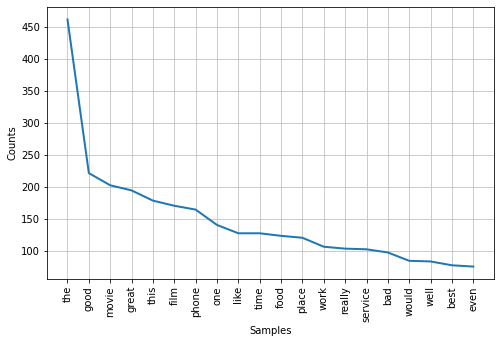

In [112]:
freqPlotter(new_words)

(-0.5, 399.5, 199.5, -0.5)

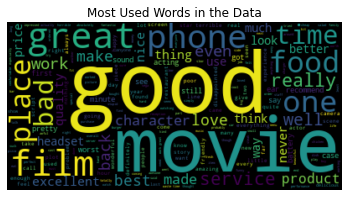

In [113]:
final_wcloud = WordCloud(random_state = 0).generate(" ".join(new_words))
plt.title("Most Used Words in the Data")
plt.imshow(final_wcloud, interpolation = "bilinear")
plt.axis("off")

In [114]:
def stripBadWords(newWords):
    bad_words = ["the","movie","place","food","film","phone", "this","one"]
    newWords = [word.strip("!").strip(",") for word in newWords if word not in bad_words]
    return newWords

In [115]:
def newfeatureExtractor(sentenceList):
    wordLists = [sent.split() for sent in sentenceList]
    features = [" ".join(stripBadWords(trashRemover(removeThe(wordlist)))) for wordlist in wordLists]
    
    return features

newfeatureExtractor(["Madagascar is place fucking stupid","I the will ,movie fucking!! destroy you"])

['madagascar fucking stupid', 'fucking destroy']

In [116]:
clean_df = final_df
clean_df["Reviews"] = newfeatureExtractor(final_df["Reviews"])
getFreqTable(clean_df["Reviews"]).head(10)

,Words,Frequencies
286,great,9
274,good,7
56,disappointed,6
18,work great,5
1170,back,5
214,would recommend,4
332,disappointing,4
288,excellent,4
265,waste money,4
1122,delicious,3


In [119]:
Tfid_train, Tfid_test, tfidy_train, tfidy_test = train_test_split(clean_df["Reviews"],clean_df["Labels"], test_size=0.33, random_state=2, stratify= clean_df["Labels"])
tfid_train = tfidf_vectorizer.fit_transform(Tfid_train)
tfid_test = tfidf_vectorizer.transform(Tfid_test)

In [121]:
svm = SVC(C = 1.3)
svm.fit(tfid_train.toarray(),y_train)
print("Training Accuracy: " +str(svm.score(tfid_train.toarray(),y_train)))
print("Testing Accuracy: " +str(svm.score(tfid_test.toarray(),y_test)))

Training Accuracy: 0.9690385659967409
Testing Accuracy: 0.5148842337375965


In [122]:
alpha_values = [0.2, 0.5, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0]
cnb_train_accuracy2 = []
cnb_test_accuracy2 = []
for value in alpha_values:
    cnb = ComplementNB(alpha = value)
    cnb.fit(tfid_train.toarray(),y_train)
    cnb_train_accuracy2.append(cnb.score(tfid_train.toarray(),y_train))
    cnb_test_accuracy2.append(cnb.score(tfid_test.toarray(),y_test))

In [123]:
cnb_df2 = make_df(alpha_values,cnb_train_accuracy2,cnb_test_accuracy2)
cnb_df2

,Alpha_Values,train_accuracy,test_accuracy
0,0.2,0.897338,0.506064
1,0.5,0.889734,0.510474
2,0.7,0.885388,0.514884
3,1.0,0.882672,0.524807
4,1.3,0.879957,0.518192
5,1.5,0.879413,0.518192
6,1.7,0.876697,0.514884
7,2.0,0.871809,0.518192


In [124]:
alpha_values = [2.1, 2.3, 2.5, 2.7,2.9, 3.1]
cnb_train_accuracy3 = []
cnb_test_accuracy3 = []
for value in alpha_values:
    cnb = ComplementNB(alpha = value)
    cnb.fit(tfid_train.toarray(),y_train)
    cnb_train_accuracy3.append(cnb.score(tfid_train.toarray(),y_train))
    cnb_test_accuracy3.append(cnb.score(tfid_test.toarray(),y_test))

cnb_df3 = make_df(alpha_values,cnb_train_accuracy3,cnb_test_accuracy3)
cnb_df3

,Alpha_Values,train_accuracy,test_accuracy
0,2.1,0.870722,0.517089
1,2.3,0.870179,0.518192
2,2.5,0.868550,0.518192
3,2.7,0.863661,0.517089
4,2.9,0.860945,0.519294
5,3.1,0.859316,0.518192


In [131]:
k_train_accuracy =[]
k_test_accuracy =[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(tfid_train.toarray(),y_train)
    k_train_accuracy.append(knn.score(tfid_train.toarray(),y_train))
    k_test_accuracy.append(knn.score(tfid_test.toarray(),y_test))

In [132]:
kdf = pd.DataFrame(index = range(1,11), columns=["train_accuracy","test_accuracy"])
kdf["train_accuracy"],kdf["test_accuracy"] = k_train_accuracy,k_test_accuracy
kdf

,train_accuracy,test_accuracy
1,0.978273,0.521499
2,0.906573,0.521499
3,0.574688,0.507166
4,0.647474,0.507166
5,0.699620,0.508269
6,0.612710,0.512679
7,0.648561,0.514884
8,0.581749,0.511577
9,0.639870,0.518192
10,0.567626,0.498346


## Conclusion
-  We can see on observing the results that the complement naive baye and support vector machine algorithms perform most favorably on the data set with an optimum testing accuracy of 77.8 and 78.7 respectively
- Hence we shall be using the support vector algorithm to make predictions

In [145]:
from sklearn.svm import SVC
svm = SVC(C= 1.3)
y = final_df['Labels']
X_train, X_test, y_train, y_test = train_test_split(final_df['Reviews'],y, test_size = 0.3, random_state = 0)
t_train = tfidf_vectorizer.fit_transform(X_train)
t_test = tfidf_vectorizer.transform(X_test)
model =svm.fit(t_train,y_train)
score= metrics.accuracy_score(y_test, model.predict(t_test))
print("final accuracy is: " + str(score*100))

final accuracy is: 78.54545454545455


## Prediction and Testing

In [151]:
def sentimentClassify(sentence):
    tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7)
    tfidf_vectorizer.fit_transform(X_train)
    processed_sentence = tfidf_vectorizer.transform(sentence)
    prediction = model.predict(processed_sentence)
    if prediction ==1:
        print("Your statement carries a positive sentiment")
    elif prediction ==0:
        print("Your statement carries a negative sentiment")
    else:
        print("Error")
        

In [152]:
my_rating = ["Justice league: snyder's cut was a huge flop meh... I hated that movie"]
sentimentClassify(my_rating)

Your statement carries a negative sentiment
